In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray
import time
import matplotlib.patches as patches
import glob

import matplotlib.colors as mcolors

from netCDF4 import Dataset
from scipy import stats
from wrf import getvar,vinterp

## estimate of pressure levels from the hybrid coordinate:
## lev2=975, 5=925, 8=850, 12=700, 17=500,  19=400, 21=300, 24=200, 28=100
#            0          1           2           3             4
# array([99414.94  , 98741.56  , 97889.086 , 96817.77  , 95483.35  ,
#       93839.336 , 91840.836 , 89450.39  , 86644.88  , 83422.59  , +5
#       79808.49  , 75855.805 , 71642.8   , 67254.16  , 62741.484 , + 10
#       58130.36  , 53451.83  , 48741.816 , 44040.24  , 39390.688 ,  + 15
#       34839.496 , 30434.8   , 26376.332 , 22831.848 , 19761.889 ,  + 20
#       17104.797 , 14805.037 , 12814.538 , 11091.686 ,  9600.475 ,   + 25
#        8309.732 ,  7192.486 ,  6225.4106,  5388.344 ],              + 30

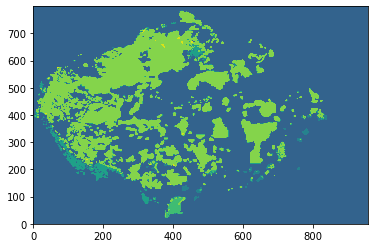

In [2]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'

file0 = path+'Amazon961x801_200809_200902/wrfinput_d01'
with xarray.open_dataset(file0,decode_times=False,
                         mask_and_scale='True') as ds0:
    lu0=ds0['LU_INDEX'][0,:,:]
    lats=ds0['XLAT'][0,:,0]
    lons=ds0['XLONG'][0,0,:]
    lu1=ds0['LU_INDEX'][0,:,:]

file1 = path+'Amazon961x801_200809_200902_ILgrassland/wrfinput_d01'
with xarray.open_dataset(file1,decode_times=False,
                         mask_and_scale='True') as ds1:
    lu1=ds1['LU_INDEX'][0,:,:]
plt.contourf(lu1-lu0)

# Cloud fraction 

In [3]:
file = path+'post_processing/Amazon961x801/3Dfields.Month12.ensmean.ctrl.nc'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds0_cld:
    print('ok')
cld0=ds0_cld['CLDFRA'][:,:,:,:] # T is perturbation temp, needs to +T0 (=300K in WRF) to get the original value.

with xarray.open_dataset(path+'post_processing/Amazon961x801/3Dfields.Month12.ensmean.ILgrassland.nc',
                         decode_times=False,
                         mask_and_scale='True') as ds1_cld:
    print('ok')
cld1=ds1_cld['CLDFRA'][:,:,:,:]

P0=ds0_cld['P'][:,:,:,:]
PB = ds0_cld['PB']
PB = ds0_cld['PB']
P0 = P0+PB

ok
ok


### There might be some orography around 17S and 5N, longitude = 67.4W (id300).

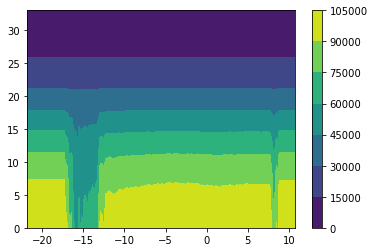

In [5]:
plt.contourf(lats,range(34),P0[12,0:,:,200])
plt.colorbar()
#cld1[12,:,250:600,300].mean(axis=1)

<ipython-input-9-5ec9920396c6>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = axes[0].pcolormesh(lons,lats,dif_cld[8,:,:],cmap='bwr',vmin=-0.1,vmax=0.1)
<ipython-input-9-5ec9920396c6>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = axes[1].pcolormesh(lons,lats,dif_cld[17,:,:],cmap='bwr',vmin=-0.1,vmax=0.1)
<ipython-input-9-5ec9920396c6>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since

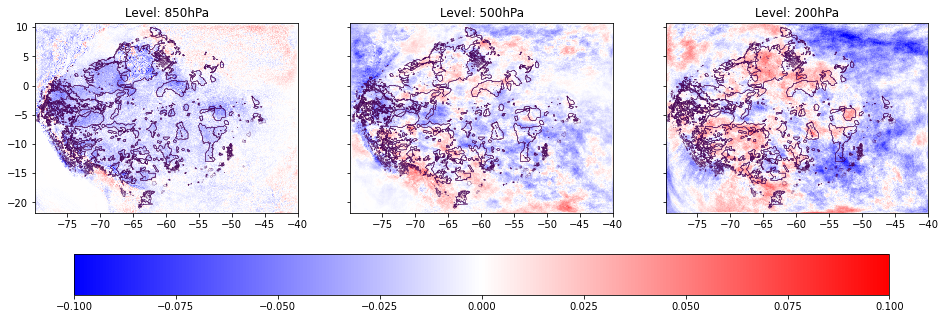

In [9]:
dif_cld = cld1[:,:,:,:].mean(axis=0)-cld0[:,:,:,:].mean(axis=0)

fig,axes = plt.subplots(1,3,figsize=(16,5),sharex=True,sharey=True)
axes = axes.flat 
im = axes[0].pcolormesh(lons,lats,dif_cld[8,:,:],cmap='bwr',vmin=-0.1,vmax=0.1)
im = axes[1].pcolormesh(lons,lats,dif_cld[17,:,:],cmap='bwr',vmin=-0.1,vmax=0.1)
im = axes[2].pcolormesh(lons,lats,dif_cld[24,:,:],cmap='bwr',vmin=-0.1,vmax=0.1)
dif_lu = lu1-lu0

lev=['850hPa','500hPa','200hPa']
for ii in range(3):
    axes[ii].contour(lons,lats,dif_lu,vmin=8,vmax=8,linewidths=0.25) 
    axes[ii].set_title('Level: '+lev[ii])
fig.colorbar(im,ax=axes[:],orientation='horizontal')


In [43]:
#file0 = path+'post_processing/Amazon961x801/3Dfields.Month12.ensmean.ctrl.nc'
#file1 = path+'post_processing/Amazon961x801/3Dfields.Month12.ensmean.ILgrassland.nc'
#ncfile0 = Dataset(file0)
#C0 = getvar(ncfile0, "cloudfrac")

In [ ]:
### find the inside and outside of the IL
dif_lu = lu1-lu0
cld0_IL = cld0.where(dif_lu>0,np.nan)
cld0_out = cld0.where(dif_lu==0,np.nan)
cld1_IL = cld1.where(dif_lu>0,np.nan)
cld1_out = cld1.where(dif_lu==0,np.nan)
cld0_IL_areaave = cld0_IL.mean(('south_north','west_east'))
cld0_out_areaave = cld0_out.mean(('south_north','west_east'))
cld1_IL_areaave = cld1_IL.mean(('south_north','west_east'))
cld1_out_areaave = cld1_out.mean(('south_north','west_east'))

cld0_IL_areaave = cld0_IL.mean(('south_north','west_east'))
cld0_out_areaave = cld0_out.mean(('south_north','west_east'))
cld1_IL_areaave = cld1_IL.mean(('south_north','west_east'))
cld1_out_areaave = cld1_out.mean(('south_north','west_east'))

cld0_IL_areaave.to_netcdf(path+'post_processing/Amazon561x721/cldfrac_IL_areaave.obs.nc')
cld0_out_areaave.to_netcdf(path+'post_processing/Amazon561x721/cldfrac_out_areaave.obs.nc')
cld1_IL_areaave.to_netcdf(path+'post_processing/Amazon561x721/cldfrac_IL_areaave.ILdeforested.nc')
cld1_out_areaave.to_netcdf(path+'post_processing/Amazon561x721/cldfrac_out_areaave.ILdeforested.nc')

In [ ]:
### find the inside and outside of the IL
dif_lu = lu1-lu0
cld0_IL = cld0.where(dif_lu>0,np.nan)
cld0_out = cld0.where(dif_lu==0,np.nan)
cld1_IL = cld1.where(dif_lu>0,np.nan)
cld1_out = cld1.where(dif_lu==0,np.nan)
cld0_IL_areaave = cld0_IL.mean(('south_north','west_east'))
cld0_out_areaave = cld0_out.mean(('south_north','west_east'))
cld1_IL_areaave = cld1_IL.mean(('south_north','west_east'))
cld1_out_areaave = cld1_out.mean(('south_north','west_east'))

cld0_IL_areaave = cld0_IL.mean(('south_north','west_east'))
cld0_out_areaave = cld0_out.mean(('south_north','west_east'))
cld1_IL_areaave = cld1_IL.mean(('south_north','west_east'))
cld1_out_areaave = cld1_out.mean(('south_north','west_east'))

cld0_IL_areaave.to_netcdf(path+'post_processing/Amazon561x721/cldfrac_IL_areaave.obs.nc')
cld0_out_areaave.to_netcdf(path+'post_processing/Amazon561x721/cldfrac_out_areaave.obs.nc')
cld1_IL_areaave.to_netcdf(path+'post_processing/Amazon561x721/cldfrac_IL_areaave.ILdeforested.nc')
cld1_out_areaave.to_netcdf(path+'post_processing/Amazon561x721/cldfrac_out_areaave.ILdeforested.nc')

# Humidity

In [3]:
### Cloud fraction 
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
file = path+'post_processing/Amazon561x721/qvapor.201511.obs.nc'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds0_cld:
    print('ok')
cld0=ds0_cld['QVAPOR'][:,:,:,:]#.mean(('south_north','west_east'))

with xarray.open_dataset(path+'post_processing/Amazon561x721/qvapor.201511.ILdeforested.nc',
                         decode_times=False,
                         mask_and_scale='True') as ds1_cld:
    print('ok')
cld1=ds1_cld['QVAPOR'][:,:,:,:]#.mean(('south_north','west_east'))

### find the inside and outside of the IL
dif_lu = lu1-lu0
cld0_IL = cld0.where(dif_lu>0,np.nan)
cld0_out = cld0.where(dif_lu==0,np.nan)
cld1_IL = cld1.where(dif_lu>0,np.nan)
cld1_out = cld1.where(dif_lu==0,np.nan)
cld0_IL_areaave = cld0_IL.mean(('south_north','west_east'))
cld0_out_areaave = cld0_out.mean(('south_north','west_east'))
cld1_IL_areaave = cld1_IL.mean(('south_north','west_east'))
cld1_out_areaave = cld1_out.mean(('south_north','west_east'))

cld0_IL_areaave = cld0_IL.mean(('south_north','west_east'))
cld0_out_areaave = cld0_out.mean(('south_north','west_east'))
cld1_IL_areaave = cld1_IL.mean(('south_north','west_east'))
cld1_out_areaave = cld1_out.mean(('south_north','west_east'))

cld0_IL_areaave.to_netcdf(path+'post_processing/Amazon561x721/qvapor_IL_areaave.obs.nc')
cld0_out_areaave.to_netcdf(path+'post_processing/Amazon561x721/qvapor_out_areaave.obs.nc')
cld1_IL_areaave.to_netcdf(path+'post_processing/Amazon561x721/qvapor_IL_areaave.ILdeforested.nc')
cld1_out_areaave.to_netcdf(path+'post_processing/Amazon561x721/qvapor_out_areaave.ILdeforested.nc')

ok
ok
